<a href="https://colab.research.google.com/github/shubhs42/DeepLearnCVBootCamp/blob/main/NLP_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Natural Language Processing Assignment 1**

**Assignment Objective** - You have to implement all of these techniques on a small corpus of your own choice taken from the web. Make sure to use the same corpus for all the tasks, also please give the reference of where you chose the corpus from. People attempting for advanced level are recommended to use a larger(production level/real-use) dataset.


## **Text Pre-processing for Natural Language Processing (NLP)**

Text preprocessing in NLP is the process of cleaning and preparing raw text data for analysis by machine learning or deep learning models. It involves converting text into a structured format through various steps. These steps ensure the text is consistent and meaningful, enabling models to better understand and process the data efficiently. Proper preprocessing is essential for improving the performance and accuracy of NLP models. The steps involved in pre-processing which we are going to be looking at in this tutorial are:
1) **Lowercasing**
2) **Removing Punctuations and Special Characrters**
3) **Stop-Words removal**
4) **Removal of URLs**
5) **Removal of HTML Tags**
6) **Stemming**
7) **Lemmatization**
8) **Tokenization**

====================================================================================================

In [1]:
# Install and set up Kaggle API

!pip install kaggle --quiet

#will work only if kaggle.json is already in the current directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [2]:

# Download E-commerce Reviews dataset into pandas

kaggle_url = "https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews"

import re
match = re.match(r".*kaggle\.com/datasets/([^/]+)/([^/?#]+)", kaggle_url)
import pandas as pd
import os

owner, dataset = match.group(1), match.group(2)
!kaggle datasets download -d {owner}/{dataset} --unzip -p ./dataset

csv_files = [f for f in os.listdir("./dataset") if f.endswith(".csv")]
df = pd.read_csv(os.path.join("./dataset", csv_files[0]))
print(df.head())


Dataset URL: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews
License(s): CC0-1.0
  0% 0.00/2.79M [00:00<?, ?B/s]
100% 2.79M/2.79M [00:00<00:00, 445MB/s]
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...

<style>
blue {
  color: skyblue;
}
</style>

## 1) **Lowercasing**
Lowercasing converts all characters in a text to <blue>**lowercase**</blue>. It ensures uniformity by treating words like <blue>**"Dog"**</blue> and <blue>**"dog"**</blue> as the same entity. This is important for many NLP tasks since capitalization usually doesn't change the meaning of words.

Example:\
Input: "Natural Language Processing"\
Output: "natural language processing"

In [3]:
text = df['Review Text'].astype(str)
lowercased_text = text.str.lower()
print(lowercased_text.head(10))

0    absolutely wonderful - silky and sexy and comf...
1    love this dress!  it's sooo pretty.  i happene...
2    i had such high hopes for this dress and reall...
3    i love, love, love this jumpsuit. it's fun, fl...
4    this shirt is very flattering to all due to th...
5    i love tracy reese dresses, but this one is no...
6    i aded this in my basket at hte last mintue to...
7    i ordered this in carbon for store pick up, an...
8    i love this dress. i usually get an xs but it ...
9    i'm 5"5' and 125 lbs. i ordered the s petite t...
Name: Review Text, dtype: object


<style>
blue {
  color: skyblue;
}
</style>
## 2) **Removing Punctuation & Special Characters**

Punctuation marks (like <blue>**commas**</blue>, <blue>**periods**</blue>, <blue>**dash**</blue> etc.) and special characters (like <blue>**@**</blue>, <blue>**#**</blue>, <blue>**$**</blue>, etc.) are often not meaningful in many NLP tasks. Removing them helps clean the text for better analysis.

Example:\
Input: "Hello! How are you doing @today?"\
Output: "Hello How are you doing today"


In [4]:
import re
# text = "Hello, world ✋✋! Welcome to?* our&/|~^+%'\" NLP - Deep Learning🧠 Bootcamp🤩."
#text = df['Review Text']#.iloc[0] #Sample check
punctuation_pattern = r'[^\w\s]'
#text_cleaned = re.sub(punctuation_pattern, '', text) #put in loop
# print(text_cleaned)
# Create an empty list to store cleaned text
cleaned_texts = []

# Loop through each review in the dataset
for text in df['Review Text']:
    text_cleaned = re.sub(punctuation_pattern, '', str(text))
    cleaned_texts.append(text_cleaned)

# Store results in a new column
df['cleaned_text'] = cleaned_texts
print(df['cleaned_text'].head())


0    Absolutely wonderful  silky and sexy and comfo...
1    Love this dress  its sooo pretty  i happened t...
2    I had such high hopes for this dress and reall...
3    I love love love this jumpsuit its fun flirty ...
4    This shirt is very flattering to all due to th...
Name: cleaned_text, dtype: object


<style>
blue {
  color: skyblue;
}
</style>
## 3) **Stop - Words Removal**

Stop-words are common words like <blue>**"the"**</blue>, <blue>**"is"**</blue>, <blue>**"in"**</blue>, <blue>**"and"**</blue> that don't contribute significant meaning to the text. Removing them helps reduce the size of the dataset <blue>**without losing important context**</blue>.

Example:\
Input: "This is a sample sentence"\
Output: "sample sentence"

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Remove stopwords function for any language
def remove_stopwords(text, language):
    stop_words = set(stopwords.words(language))
    word_tokens = text.split()
    filtered_text = [word for word in word_tokens if word not in stop_words]
    #print(f"Language: {language}")
    return filtered_text
    print("Filtered Text:", filtered_text)


# # Hindi + English - Example
# hi_text = df['Review Text'].iloc[0]
# remove_stopwords(hi_text, "hinglish")
cleaned_stopwords = []

for text in df['cleaned_text']:
    t = str(text).lower()
    cleaned_stopwords.append(remove_stopwords(t, "english"))

df['no_stopwords'] = cleaned_stopwords
print(df['no_stopwords'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: no_stopwords, dtype: object


<style>
blue {
  color: skyblue;
}
</style>
## 4) **Removal of URLs**

URLs are often <blue>**irrelevant**</blue> in NLP tasks and can add noise to the data. Removing them ensures cleaner text without <blue>**web links**</blue> that don’t contribute to the context.

Example:\
Input: "Check out this link: https://example.com"\
Output: "Check out this link"

In [6]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# text = df['Review Text'].iloc[0]
# remove_urls(text)

no_urls = []
for text in df['no_stopwords']:
    text_joined = ' '.join(text) if text else ''
    no_urls.append(remove_urls(text_joined))
df['no_urls'] = no_urls
print(df['no_urls'].head())

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hopes dress really wanted work initially ...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: no_urls, dtype: object


<style>
blue {
  color: skyblue;
}
</style>
## 5) **Removal of HTML Tags**

HTML tags are used in web data but are <blue>**unnecessary**</blue> in NLP tasks. <blue>**Stripping**</blue> out HTML tags cleans the text extracted from <blue>**web pages**</blue>.

Example:\
Input: "&lt;p>This is a paragraph.&lt;/p>"\
Output: "This is a paragraph."

In [7]:
import re

# text = """<html><div>
# <h1>NLP - Deep Learning</h1>
# <p>Removal of HTML tags</p>
# <a href="https://example.com"></a>
# </div></html>"""

html_tags_pattern = r'<.*?>'
def remove_html_tags(text):
    return re.sub(html_tags_pattern, '', text)
no_html = []
for text in df['no_urls']:
    no_html.append(remove_html_tags(text))
df['no_html'] = no_html
print(df['no_html'].head())

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hopes dress really wanted work initially ...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: no_html, dtype: object


<style>
blue {
  color: skyblue;
}
</style>
## 6) **Stemming**

Stemming reduces a word to its <blue>**base**</blue> or <blue>**root**</blue> form, which might not always be a valid word. The idea is to <blue>**strip**</blue> off <blue>**prefixes**</blue> or <blue>**suffixes**</blue>. It’s a quick and less computationally expensive way of normalizing words. Stemming is preferred when the <blue>**meaning**</blue> of the word is <blue>**not important**</blue> for analysis. for example: <blue>**Spam Detection**</blue>

Example:\
Input: "Playing", "Played", "Plays"\
Output: "Play"

<blue>**Porter stemming**</blue> algorithm is one of the most common stemming algorithms which is basically designed to <blue>**remove**</blue> and <blue>**replace**</blue> well-known <blue>**suffixes**</blue> of English words. Although the Porter Stemming Algorithm was developed for English texts, it can be adapted to different languages. However, it is more effective to use natural language processing tools and algorithms specifically designed for different languages, like the library <blue>**iNLTK**</blue> offers these tools for <blue>**Indic Languages**</blue>. You can find it out here: <blue>**https://github.com/goru001/inltk**</blue>

<div style="font-style: italic; text-align: center;" markdown="1">
<img width="30%" src="https://cdn.botpenguin.com/assets/website/Stemming_53678d43bc.png">
</div>

In [8]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_words(text):
    word_tokens = text.split()
    stems = [stemmer.stem(word) for word in word_tokens]
    return stems

# text =  df['text_no_stopwords']
# stem_words(text)
stemmed_texts = []
for text in df['no_html']:
    stemmed_texts.append(stem_words(text))
df['stemmed'] = stemmed_texts
print(df['stemmed'].head())

0              [absolut, wonder, silki, sexi, comfort]
1    [love, dress, sooo, pretti, happen, find, stor...
2    [high, hope, dress, realli, want, work, initi,...
3    [love, love, love, jumpsuit, fun, flirti, fabu...
4    [shirt, flatter, due, adjust, front, tie, perf...
Name: stemmed, dtype: object


<style>
blue {
  color: skyblue;
}
</style>
## 7) **Lemmatization**

Lemmatization is a more advanced technique compared to stemming. It <blue>**reduces**</blue> a word to its <blue>**base form (called a lemma)**</blue> while ensuring the <blue>**output**</blue> is a <blue>**valid word**</blue>. It uses context to determine whether the word is in singular, plural, or tense forms.

Example:\
Input: "Running", "Ran"\
Output: "Run"

In our lemmatization example, we will be using a popular lemmatizer called <blue>**WordNet**</blue> lemmatizer. WordNet is a word association database for English and a useful resource for English lemmatization. A popular lemmatizer used for Hindi is developed by <blue>**JohSnowLabs**</blue> can be found here: <blue>**https://sparknlp.org/2020/07/29/lemma_hi.html**</blue>

<div style="font-style: italic; text-align: center;" markdown="1">
<img width="30%" src="https://cdn.botpenguin.com/assets/website/Lemmatization_5338fc7c3e.png">
</div>

In [9]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_word(text):
    word_tokens = text.split()
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas

# text = 'text preprocessing section in course nlp - deep learning'
# print(lemmatize_word(text))
lemmatized_texts = []
for text in df['stemmed']:  # or df['no_html']
    text_joined = ' '.join(text) if isinstance(text, list) else str(text)
    lemmas = lemmatize_word(text_joined)
    lemmatized_texts.append(lemmas)
df['lemmatized'] = lemmatized_texts
print(df['lemmatized'].head())

0              [absolut, wonder, silki, sexi, comfort]
1    [love, dress, sooo, pretti, happen, find, stor...
2    [high, hope, dress, realli, want, work, initi,...
3    [love, love, love, jumpsuit, fun, flirti, fabu...
4    [shirt, flatter, due, adjust, front, tie, perf...
Name: lemmatized, dtype: object


<style>
blue {
  color: skyblue;
}
</style>
## 8) **Tokenization**

Tokenization is the process of <blue>**splitting**</blue> a text into <blue>**individual units**</blue> like words, phrases, or sentences, called <blue>**tokens**</blue>. These tokens form the building blocks for further processing and analysis in NLP tasks.

Example:\
Input: "Congratulations you are almost at the end of this file."\
Output: ["Congratulations", "you", "are", "almost", "at", "the", "end", "of", "this", "file", "."]

There are different methods and libraries available to perform tokenization. <blue>**SpaCy**</blue> and <blue>**Gensim**</blue> are some of the libraries that can be used to accomplish the task.
Tokenization can be used to separate words or sentences. If the text is split into <blue>**words**</blue> using some separation technique it is called <blue>**word tokenization**</blue> and the same separation done for <blue>**sentences**</blue> is called <blue>**sentence tokenization**</blue>.

In [11]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
import nltk
from nltk.tokenize import word_tokenize

# text = "Congratulations you are almost at the end of this file."

# tokens = word_tokenize(text)
# print(tokens)
tokenized_texts = []
for text in df['lemmatized']:
    text_joined = ' '.join(text) if isinstance(text, list) else str(text)
    tokenized_texts.append(word_tokenize(text_joined))
df['tokens'] = tokenized_texts
print(df['tokens'].head())


0              [absolut, wonder, silki, sexi, comfort]
1    [love, dress, sooo, pretti, happen, find, stor...
2    [high, hope, dress, realli, want, work, initi,...
3    [love, love, love, jumpsuit, fun, flirti, fabu...
4    [shirt, flatter, due, adjust, front, tie, perf...
Name: tokens, dtype: object


## **Text Processing for Natural Language Processing (NLP)**

In text processing for NLP, Bag of Words (BoW) is a simple model where a text is represented as a collection of words, disregarding grammar and order, focusing only on word frequency. TF-IDF (Term Frequency-Inverse Document Frequency) improves upon BoW by assigning weights to words based on their importance, emphasizing words that are common in a document but rare across other documents. Word2Vec, a more advanced approach, generates dense word embeddings by training a neural network to map words to vectors, capturing semantic relationships and similarities between words based on context in large datasets. In this tutorial we will be looking at the following topics:
1) **Bag of Words (BoW)**
2) **Term Frequency-Inverse Document Frequency (TF-IDF)**
3) **Encodings**
4) **Word Embeddings**
5) **Word2Vec**

====================================================================================================

<style>
blue {
  color: skyblue;
}
</style>

## 1) **Bag of Words (BoW)**

Bag of Words (BoW) is a simple text representation method used in NLP where a document is represented by the <blue>**frequency**</blue> of words in it, <blue>**without considering grammar**</blue>, <blue>**order**</blue>, or <blue>**context**</blue>. It treats every word as <blue>**independent**</blue> and counts its occurrences in the text. For example, in the sentences "The cat sits on the mat" and "The dog sits on the mat", the BoW would capture the words "The", "cat", "sits", "on", "the", "mat", "dog", with their respective frequencies. However, BoW <blue>**cannot capture meaning**</blue> or relationships between words, as it focuses solely on word presence and counts.

In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords

# Defining all pre-processing steps
def preprocessing_text(text):
    lemmatizer = WordNetLemmatizer()
    emoji_pattern = r'^(?:[\u2700-\u27bf]|(?:\ud83c[\udde6-\uddff]){1,2}|(?:\ud83d[\udc00-\ude4f]){1,2}|[\ud800-\udbff][\udc00-\udfff]|[\u0021-\u002f\u003a-\u0040\u005b-\u0060\u007b-\u007e]|\u3299|\u3297|\u303d|\u3030|\u24c2|\ud83c[\udd70-\udd71]|\ud83c[\udd7e-\udd7f]|\ud83c\udd8e|\ud83c[\udd91-\udd9a]|\ud83c[\udde6-\uddff]|\ud83c[\ude01-\ude02]|\ud83c\ude1a|\ud83c\ude2f|\ud83c[\ude32-\ude3a]|\ud83c[\ude50-\ude51]|\u203c|\u2049|\u25aa|\u25ab|\u25b6|\u25c0|\u25fb|\u25fc|\u25fd|\u25fe|\u2600|\u2601|\u260e|\u2611|[^\u0000-\u007F])+$'

    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(emoji_pattern, '', text)
    text= re.sub(r'\s+', ' ', text)
    text= text.lower().strip()

    return text

# paragraph = """Welcome to the NLP - Deep Learning Bootcamp.
#             Hope that you have watched all the resources uploaded on our official notion page.
#             If you have not please begin there, thanks!
#             """

# sentences_list = nltk.sent_tokenize(paragraph)

# corpus = [preprocessing_text(sentence) for sentence in sentences_list]

# print(corpus)

paragraphs = []

for tokens in df['tokens']:
    if isinstance(tokens, list):
        joined_text = ' '.join(tokens)
    else:
        joined_text = str(tokens)
    paragraphs.append(joined_text)


sentences_list = paragraphs
corpus = sentences_list

In [14]:
# Creating a Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
X_array = X.toarray()

print("Unique Word List: \n", feature_names)
print("Bag of Words Matrix: \n", X_array)

Unique Word List: 
 ['00' '000' '002first' ... 'zoom' 'zuma' 'ã¼ber']
Bag of Words Matrix: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
# Visualizing results in tabular form
import pandas as pd

df_bow = pd.DataFrame(data=X_array, columns=feature_names, index=range(len(corpus)))
df_bow

,00,000,002first,00p,00p0p,00p0rxxsx,02,025,02x,03,...,zipper,zipperi,zipperon,zippi,zombi,zone,zooland,zoom,zuma,ã¼ber
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<style>
blue {
  color: skyblue;
}
</style>

## 2) **Term Frequency-Inverse Document Frequency (TF-IDF)**

TF-IDF is an extension of BoW that <blue>**assigns**</blue> a <blue>**weight**</blue> to each word, reflecting its <blue>**importance**</blue> in a document relative to a collection of documents (corpus). <blue>**Term Frequency (TF)**</blue> refers to <blue>**how often**</blue> a word appears in a document, while <blue>**Inverse Document Frequency (IDF)**</blue> measures <blue>**how rare**</blue> a word is across the entire corpus. Words that occur frequently in one document but rarely across others get higher TF-IDF scores. For example, <blue>**common words**</blue> like "the" and "is" receive <blue>**low weights**</blue>, while more <blue>**unique words**</blue> like "neural" in an article about AI would have a <blue>**higher weight**</blue>, giving a better sense of relevance.

In [16]:
from nltk.stem import WordNetLemmatizer
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Define all pre-processing steps except for Lemmatization
def preprocessing_text(text):
    emoji_pattern = r'^(?:[\u2700-\u27bf]|(?:\ud83c[\udde6-\uddff]){1,2}|(?:\ud83d[\udc00-\ude4f]){1,2}|[\ud800-\udbff][\udc00-\udfff]|[\u0021-\u002f\u003a-\u0040\u005b-\u0060\u007b-\u007e]|\u3299|\u3297|\u303d|\u3030|\u24c2|\ud83c[\udd70-\udd71]|\ud83c[\udd7e-\udd7f]|\ud83c\udd8e|\ud83c[\udd91-\udd9a]|\ud83c[\udde6-\uddff]|\ud83c[\ude01-\ude02]|\ud83c\ude1a|\ud83c\ude2f|\ud83c[\ude32-\ude3a]|\ud83c[\ude50-\ude51]|\u203c|\u2049|\u25aa|\u25ab|\u25b6|\u25c0|\u25fb|\u25fc|\u25fd|\u25fe|\u2600|\u2601|\u260e|\u2611|[^\u0000-\u007F])+$'

    text= text.lower()
    text = text.split()
    text = ' '.join(text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(emoji_pattern, '', text)
    text= re.sub(r'\s+', ' ', text)

    return text

# comments = """Welcome to the NLP - Deep Learning Bootcamp.
#             Hope that you have watched all the resources uploaded on our official notion page.
#             If you have not please begin there, thanks!
#             """

# sentences_list = nltk.sent_tokenize(comments)
# corpus = [preprocessing_text(sentence) for sentence in sentences_list]
# corpus

In [17]:
corpus = []

# Loop through each row in df['tokens']
for tokens in df['tokens']:
    # Join tokens back into a sentence
    if isinstance(tokens, list):
        joined_text = ' '.join(tokens)
    else:
        joined_text = str(tokens)

    # Apply preprocessing function again )
    cleaned_text = preprocessing_text(joined_text)

    # Add to corpus
    corpus.append(cleaned_text)

In [20]:
# Calculating Product of Term Frequency & Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
terms = tfidf_vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

df_tfidf

,______,_______,________,_________,__________,___________,____________,_____________,______________,_______________,...,zipper,zipperi,zipperon,zippi,zombi,zone,zooland,zoom,zuma,ã¼ber
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.132258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Creating a Word Cloud
# texts = [
#     "Python is a popular programming language.",
#     "NLP is a field of artificial intelligence that focuses on the interaction between computers and human language.",
#     "Sentiment analysis is the process of classifying the emotional intent of text.",
#     "Machine learning is an important application of AI.",
#     "Natural Language Processing is used for text analysis.",
#     "Python libraries like scikit-learn and NLTK are used in NLP.",
#     "AI and machine learning are transforming industries.",
#     "If you are interested in NLP, stay tuned!"
# ]
all_text = ' '.join(corpus)

In [36]:
import re

def clean_text(text):
    clean_txt = text.lower()
    # Clear characters other than numbers and letters of the alphabet only
    clean_txt = re.sub(r'[^0-9a-zçğıiöşü\s]', '', clean_txt,
                       flags=re.IGNORECASE)

    return clean_txt

cleaned_texts = [clean_text(all_text) ]

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(cleaned_texts)

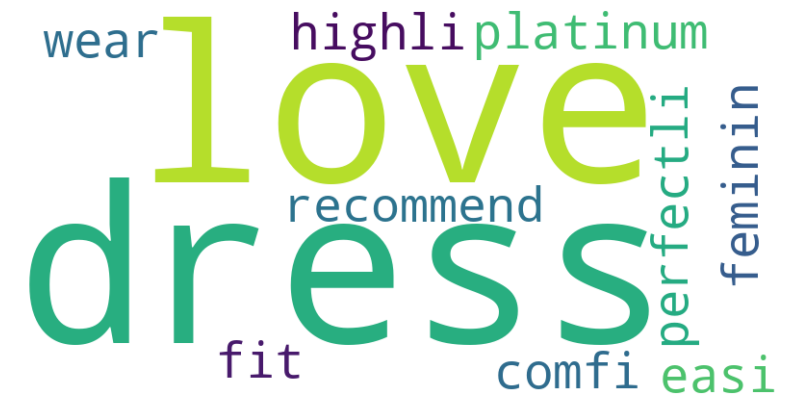

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vectorizer.vocabulary_)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Advaced Level (Optional for Basic Level)**

<style>
blue {
  color: skyblue;
}
</style>

## 3) **Encodings**

<blue>**Label Encoding**</blue> is a technique used in machine learning and data processing to convert <blue>**categorical data**</blue> (such as text-based or symbolic data) into <blue>**numerical values**</blue>. For example, if you have categories like “Apple”, “Chicken” and “Broccoli” you assign them numerical labels such as 1 for “Apple”, 2 for “Chicken” and 3 for “Broccoli”.

<blue>**One-hot Encoding**</blue> is another technique used in machine learning to convert <blue>**categorical data**</blue> into a format that can be provided to machine learning algorithms more easily. One-hot Encoding takes each categorical value and turns it into a <blue>**binary vector**</blue>. Each category is represented as a binary vector.


In [39]:
import nltk
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Download NLTK data
nltk.download('punkt')

# Sample corpus
# corpus = [
#     "Python is a popular programming language.",
#     "NLP is a field of artificial intelligence that focuses on the interaction between computers and human language.",
#     "Sentiment analysis is the process of classifying the emotional intent of text.",
#     "Machine learning is an important application of AI.",
#     "Natural Language Processing is used for text analysis.",
#     "Python libraries like scikit-learn and NLTK are used in NLP.",
#     "AI and machine learning are transforming industries.",
#     "If you are interested in NLP, stay tuned!"
# ]

# Tokenize the corpus using NLTK
tokenized_corpus = [nltk.word_tokenize(sentence.lower()) for sentence in corpus]

# Flatten the list to get all words in the corpus
all_words = [word for sentence in tokenized_corpus for word in sentence]

# Get unique words (vocabulary)
vocab = sorted(set(all_words))

# Print vocabulary
print("Vocabulary:", vocab)

# Reshape the list of words into a 2D array for OneHotEncoder
word_array = np.array(all_words).reshape(-1, 1)

# Apply OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(word_array)

# Print the one-hot encoded data
print("One-hot encoded matrix:\n", one_hot_encoded)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Vocabulary: ['_', '______', '_______', '________', '_________', '__________', '___________', '____________', '_____________', '______________', '_______________', '_________________', '__________________', '______________________', 'a', 'aa', 'aaaaaaamaz', 'aaaaandidontwanttopayforship', 'aaaaannnnnnd', 'aaaah', 'aaaahmaz', 'aaah', 'aam', 'ab', 'abbey', 'abbi', 'abck', 'abdomen', 'abdomin', 'abercrombi', 'abhor', 'abil', 'abject', 'abl', 'abnorm', 'abo', 'abolut', 'abou', 'abovethekne', 'abovetheshould', 'abroad', 'abruptli', 'absenc', 'abso', 'absolut', 'absoluti', 'absolutley', 'absolutli', 'absorb', 'abstract', 'absurd', 'absurdli', 'abt', 'abund', 'abus', 'abut', 'ac', 'acacia', 'accent', 'accentu', 'accentuatea', 'accept', 'acceptabl', 'access', 'accesso', 'accessor', 'accessori', 'accid', 'accident', 'acco', 'accomad', 'accommod', 'accomod', 'accompani', 'accomplish', 'accord', 'accordian', 'accordingli', 'accordinglythi', 'accordion', 'account', 'accumul', 'accur', 'accuraci', '

<style>
blue {
  color: skyblue;
}
</style>

## 4) **Word Embeddings**

Word embeddings are <blue>**dense vector representations**</blue> of words that capture their meanings by placing words with <blue>**similar meanings closer**</blue> in <blue>**vector space**</blue>. Unlike BoW or one-hot encoding, embeddings <blue>**capture relationships**</blue> between words based on context. For example, in an embedding space, words like "king" and "queen" or "apple" and "fruit" would be closer together, reflecting their <blue>**semantic similarity**</blue>. These embeddings are learned from large datasets and can be used as inputs to machine learning models for various NLP tasks. Popular techniques for generating word embeddings include <blue>**Word2Vec**</blue>, <blue>**GloVe**</blue>, and <blue>**FastText**</blue>.

<style>
blue {
  color: skyblue;
}
</style>

## 5) **Word2Vec**

Word2Vec is a model used to <blue>**learn word embeddings**</blue>, developed by <blue>**Google**</blue>. It transforms words into <blue>**continuous vector representations**</blue> using neural networks. There are two primary approaches: <blue>**Skip-gram**</blue> and <blue>**Continuous Bag of Words (CBOW)**</blue>. Skip-gram <blue>**predicts surrounding words**</blue> given a <blue>**target word**</blue>, while CBOW <blue>**predicts**</blue> the <blue>**target word**</blue> based on its <blue>**context**</blue>. For example, in the sentence "The dog barked loudly", Skip-gram might learn that "dog" is likely to appear near words like "barked", while CBOW learns that "dog" fits between "The" and "barked". This method helps capture semantic relationships between words in a computationally efficient manner.



In [43]:
!pip install gensim

In [ ]:
import gensim
from gensim.models import Word2Vec

# sentences = [
#     ['this', 'is', 'an', 'example', 'sentence', 'for', 'word2vec'],
#     ['we', 'are', 'creating', 'a', 'word2vec', 'model', 'using', 'the', 'gensim', 'library'],
#     ['we', 'are', 'working', 'with', 'cbow', 'and', 'skipgram', 'models'],
#     ['python', 'is', 'a', 'programming', 'language', 'for', 'natural', 'language', 'processing'],
#     ['word2vec', 'is', 'one', 'of', 'the', 'word', 'embedding', 'techniques'],
#     ['the', 'word2vec', 'model', 'is', 'used', 'for', 'word', 'embeddings'],
#     ['gensim', 'provides', 'an', 'easy', 'way', 'to', 'train', 'word2vec', 'models'],
#     ['cbow', 'and', 'skipgram', 'are', 'two', 'types', 'of', 'word2vec', 'models'],
#     ['word2vec', 'is', 'a', 'technique', 'for', 'natural', 'language', 'processing'],
#     ['this', 'sentence', 'is', 'about', 'word2vec', 'and', 'its', 'applications'],
#     ['word2vec', 'is', 'a', 'popular', 'word', 'embedding', 'method'],
#     ['many', 'researchers', 'use', 'word2vec', 'for', 'various', 'nlp', 'tasks'],
#     ['the', 'skipgram', 'model', 'focuses', 'on', 'predicting', 'context', 'words'],
#     ['cbow', 'model', 'predicts', 'the', 'center', 'word', 'from', 'context', 'words'],
#     ['natural', 'language', 'processing', 'involves', 'working', 'with', 'large', 'datasets']
# ]
sentences = []
for tokens in df['tokens']:
    if isinstance(tokens, list):
        sentences.append(tokens)
    else:
        # fallback: convert to string and split
        sentences.append(str(tokens).split())
print(sentences[:5])

cbow_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0, alpha=0.03, min_alpha=0.0007, epochs=100)
skipgram_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1, alpha=0.03, min_alpha=0.0007, epochs=100)

cbow_model.train(sentences, total_examples=len(sentences), epochs=100)
skipgram_model.train(sentences, total_examples=len(sentences), epochs=100)

word_vectors_cbow = cbow_model.wv
similarity_cbow = word_vectors_cbow.similarity('word2vec', 'gensim')
print(f"Similarity between 'word2vec' and 'gensim': {similarity_cbow} with CBOW")


word_vectors_skipgram= skipgram_model.wv
similarity_skip = word_vectors_skipgram.similarity('word2vec', 'gensim')
print(f"Similarity between 'word2vec' and 'gensim': {similarity_skip} with Skip-Gram")

[['absolut', 'wonder', 'silki', 'sexi', 'comfort'], ['love', 'dress', 'sooo', 'pretti', 'happen', 'find', 'store', 'im', 'glad', 'bc', 'never', 'would', 'order', 'onlin', 'bc', 'petit', 'buy', 'petit', '58', 'love', 'length', 'hit', 'littl', 'knee', 'would', 'definit', 'true', 'midi', 'someon', 'truli', 'petit'], ['high', 'hope', 'dress', 'realli', 'want', 'work', 'initi', 'order', 'petit', 'small', 'usual', 'size', 'find', 'outrag', 'small', 'small', 'fact', 'could', 'zip', 'reorder', 'petit', 'medium', 'ok', 'overal', 'top', 'half', 'comfort', 'fit', 'nice', 'bottom', 'half', 'tight', 'layer', 'sever', 'somewhat', 'cheap', 'net', 'layer', 'imo', 'major', 'design', 'flaw', 'net', 'layer', 'sew', 'directli', 'zipper', 'c'], ['love', 'love', 'love', 'jumpsuit', 'fun', 'flirti', 'fabul', 'everi', 'time', 'wear', 'get', 'noth', 'great', 'compliment'], ['shirt', 'flatter', 'due', 'adjust', 'front', 'tie', 'perfect', 'length', 'wear', 'leg', 'sleeveless', 'pair', 'well', 'cardigan', 'love',